# Interpolação de imagens utilizando correlação/convolução

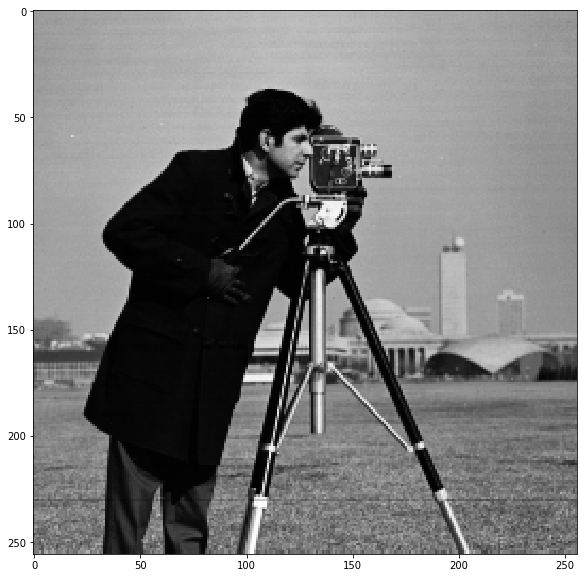

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

img = plt.imread('cameraman.tiff')
plt.figure(figsize=[10, 10])
plt.imshow(img, 'gray')

In [2]:
def upsample_2x(img, filtro):
    '''Interpola imagem utilizando o filtro fornecido na variável filtro'''
    num_rows, num_cols = img.shape
    img_upsampled = np.zeros([2*num_rows-1, 2*num_cols-1])
    for row in range(num_rows-1):
        for col in range(num_cols-1):
            img_upsampled[2*row, 2*col] = img[row, col]
    img_upsampled[-1,::-2] = img[-1]
    img_upsampled[::2,-1] = img[:,-1]

    sinal_interp = correlate(img_upsampled, filtro, mode='same')
    
    return sinal_interp

### 1. Interpolação de vizinho mais próximo (ordem 0) utilizando um filtro caixa

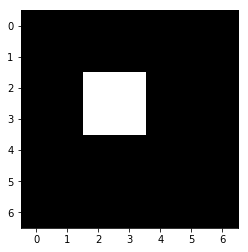

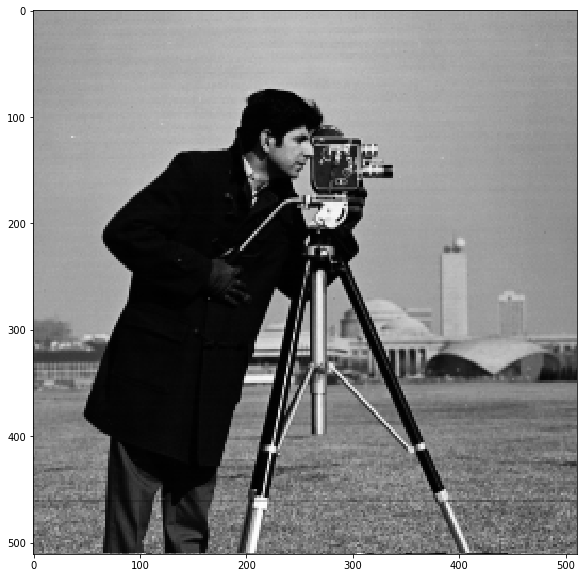

In [3]:
w = np.zeros([7,7])
w[2:4,2:4] = 1

img_interp_0 = upsample_2x(img, w)

plt.imshow(w, 'gray')
plt.figure(figsize=[10, 10])
plt.imshow(img_interp_0, 'gray')

É difícil notar diferenças entre a imagem original e interpolada de ordem 0 porque ambas as imagens são interpoladas pelo matplotlib no momento da visualização, utilizando interpolação de ordem 0.

### 2. Interpolação linear (ordem 1) utilizando um filtro cone, formado pela correlação entre dois filtros caixa

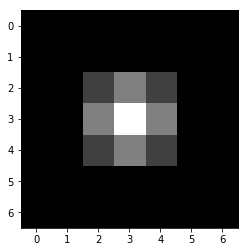

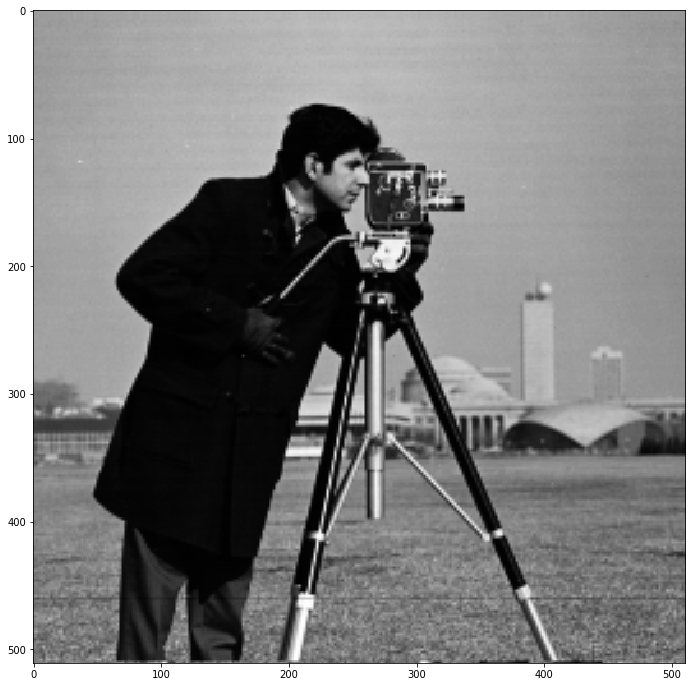

In [4]:
w2 = correlate(w, w, mode='same')
w2 = w2/4
img_interp_1 = upsample_2x(img, w2)

plt.imshow(w2, 'gray')
plt.figure(figsize=[12, 12])
plt.imshow(img_interp_1, 'gray')

### 3. "Interpolação" de ordem 3 utilizando um filtro formado pela correlação de dois filtros cone

Essa não é uma interpolação real, pois os valores em posições na imagem interpolda que coincidem com a imagem original não são os mesmos. 

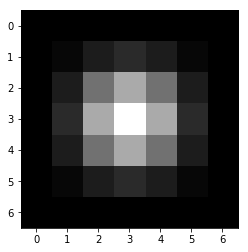

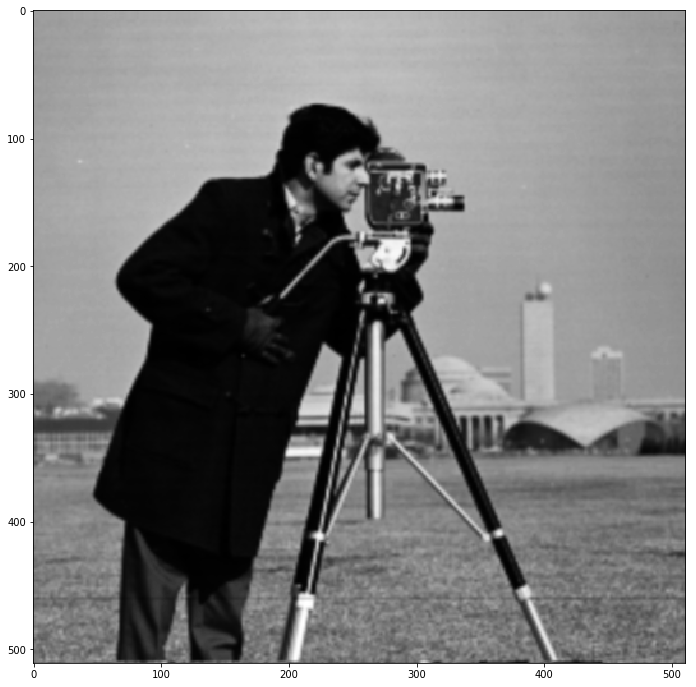

In [5]:
w3 = correlate(w2, w2, mode='same')
w3 = w3/4
img_interp_3 = upsample_2x(img, w3)

plt.imshow(w3, 'gray')
plt.figure(figsize=[12, 12])
plt.imshow(img_interp_3, 'gray')

### 4. Interpolação bicúbica (ordem 3) utilizando um filtro específico

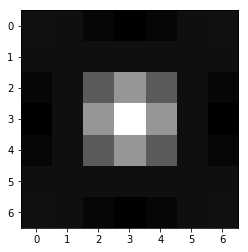

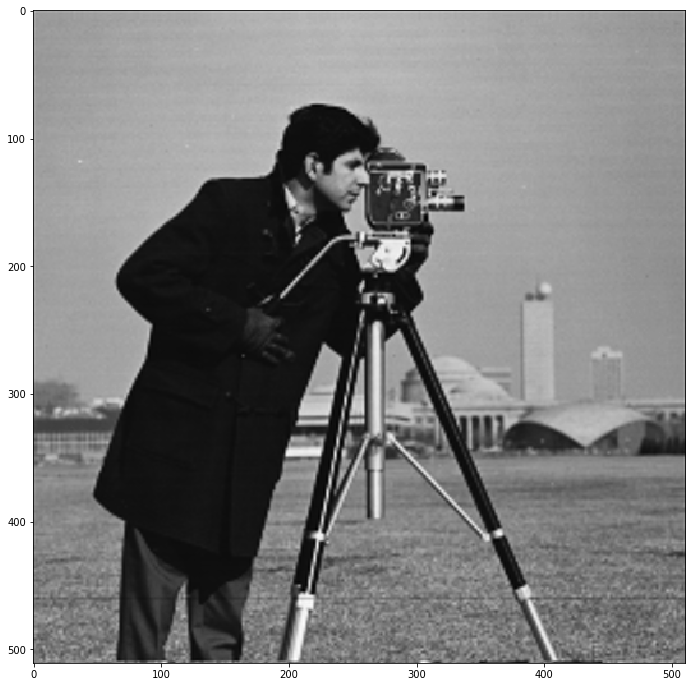

In [6]:
# Filtro de interpolação de ordem 3, conhecido como interpolação cúbica.
w_c = np.array([[-0.0625, 0, 0.5625, 1, 0.5625, 0, -0.0625]])
w_c2d = np.dot(w_c.T, w_c)
img_interp_c = upsample_2x(img, w_c2d)

plt.imshow(w_c2d, 'gray')
plt.figure(figsize=[12, 12])
plt.imshow(img_interp_c, 'gray')

### 5. Comparação entre os resultados das interpolações

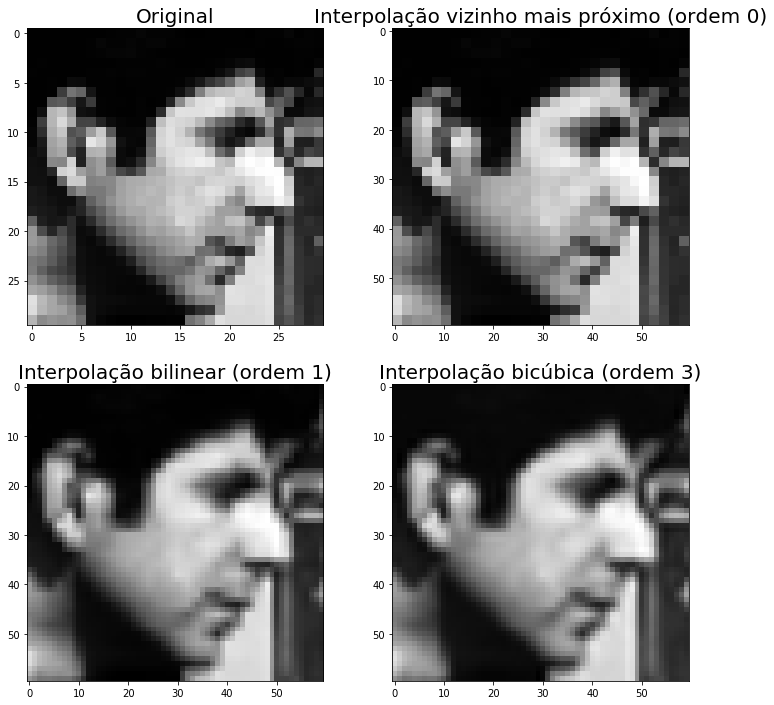

In [7]:
plt.figure(figsize=[12, 12])
plt.subplot(2, 2, 1)
plt.imshow(img[50:80, 105:135], 'gray')
plt.title('Original', size=20)
plt.subplot(2, 2, 2)
plt.imshow(img_interp_0[100:160, 210:270], 'gray')
plt.title('Interpolação vizinho mais próximo (ordem 0)', size=20)
plt.subplot(2, 2, 3)
plt.imshow(img_interp_1[100:160, 210:270], 'gray')
plt.title('Interpolação bilinear (ordem 1)', size=20)
plt.subplot(2, 2, 4)
plt.imshow(img_interp_c[100:160, 210:270], 'gray')
plt.title('Interpolação bicúbica (ordem 3)', size=20)
plt.savefig('interpolação.png', dpi=150)

#### Podemos interpolar novamente a imagem para obter uma nova imagem que possui 4x o tamanho da original

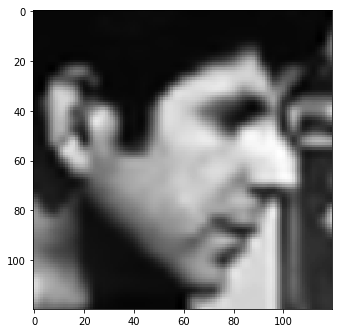

In [8]:
img_interp_c2 = upsample_2x(img_interp_c, w_c2d)
plt.figure(figsize=[5.5, 5.5])
plt.imshow(img_interp_c2[200:320, 420:540], 'gray')